In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
data_path = '/content/drive/MyDrive/filtered.tsv'

data = pd.read_csv(
    data_path, sep="\t", index_col=0
)
data.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 30.9+ MB


In [4]:
(data.ref_tox < data.trn_tox).mean()

0.4476381025897535

In [5]:
mask = data["trn_tox"] > data["ref_tox"]
temp = data.loc[mask, "reference"].copy()
data.loc[mask, "reference"] = data.loc[mask, "translation"]
data.loc[mask, "translation"] = temp

In [6]:
toxicity_threshold = 0.99
filtered_data = data[
    ((data["ref_tox"] > toxicity_threshold) & (data["trn_tox"] < 1 - toxicity_threshold))
    | ((data["trn_tox"] > toxicity_threshold) & (data["ref_tox"] < 1 - toxicity_threshold))
]

filtered_data.shape

(173907, 6)

In [7]:
(filtered_data.ref_tox < filtered_data.trn_tox).mean()

0.3458687689397206

In [8]:
data = filtered_data

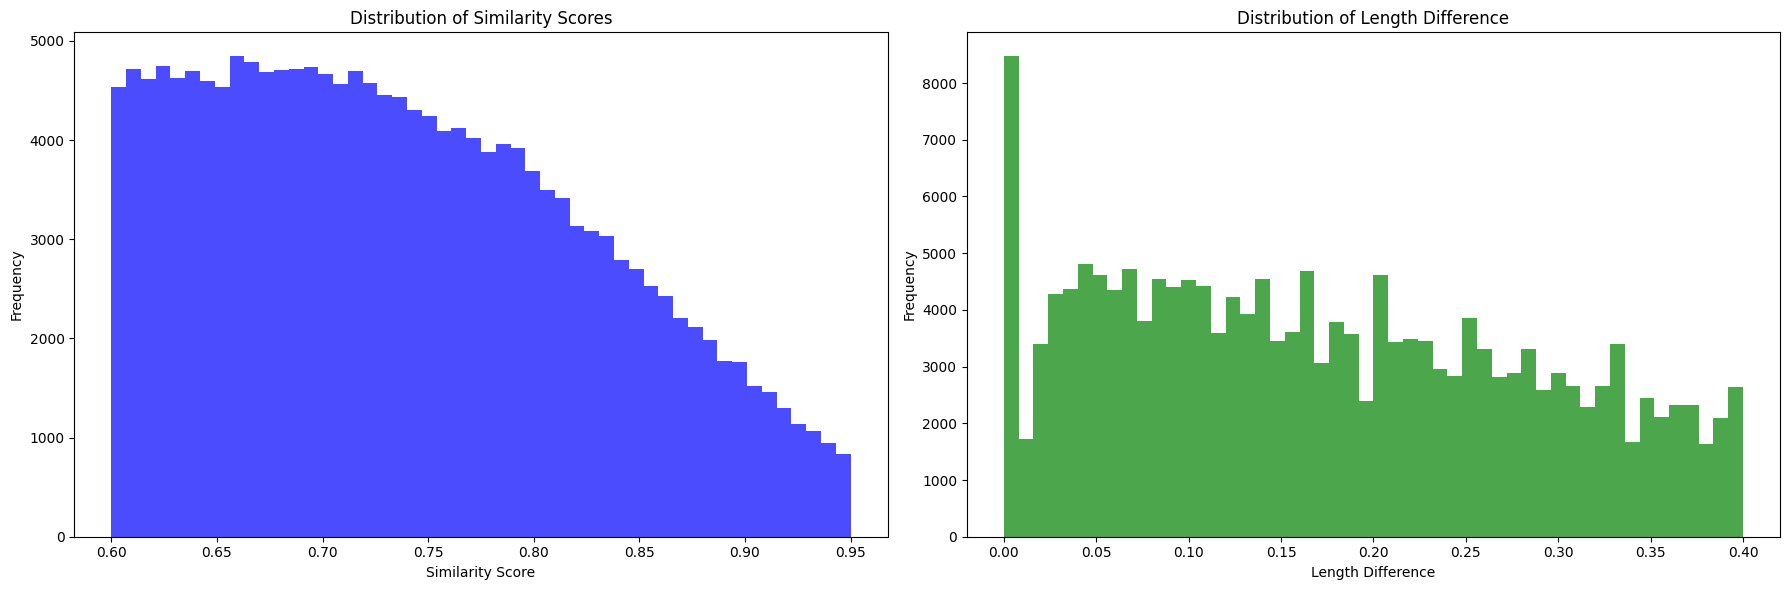

{'Average Length of Reference': 47.1468026013904,
 'Average Length of Translation': 43.469992582242234,
 'Average Similarity': 0.7397046984765029,
 'Average Length Difference': 0.1731959169900425}

In [9]:
import matplotlib.pyplot as plt

# Basic EDA: Distributions and averages
eda_data = {
    "Average Length of Reference": data['reference'].apply(len).mean(),
    "Average Length of Translation": data['translation'].apply(len).mean(),
    "Average Similarity": data['similarity'].mean(),
    "Average Length Difference": data['lenght_diff'].mean()
}

# Plotting the distributions of similarity and length difference
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Similarity score distribution
ax[0].hist(data['similarity'], bins=50, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Similarity Scores')
ax[0].set_xlabel('Similarity Score')
ax[0].set_ylabel('Frequency')

# Length difference distribution
ax[1].hist(data['lenght_diff'], bins=50, color='green', alpha=0.7)
ax[1].set_title('Distribution of Length Difference')
ax[1].set_xlabel('Length Difference')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

eda_data


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Initialize lemmatizer, stemmer and stopwords list
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize and stem each word
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]
    return ' '.join(words)

# Preprocess entries for 'reference' and 'translation' columns
data_preprocessed = data.copy()
data_preprocessed['reference'] = data_preprocessed['reference'].apply(preprocess_text)
data_preprocessed['translation'] = data_preprocessed['translation'].apply(preprocess_text)

data_preprocessed[['reference', 'translation']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,reference,translation
4,order kill,ive got order put
6,theyr laugh u well kick as,theyr laugh u well show
13,come cal leav shit alon,come cal put
14,he tallest son bitch,he top dog
22,real life start first time fuck kid,boy real life start first
...,...,...
577752,shit happen,happen
577753,sometim girl stop nice get shit,domino sometim girl naughti get jam
577764,execut chief,carri chief
577775,call fuck hero truth didnt care anymor,said hero didnt care


In [11]:
data_preprocessed[['reference', 'translation']].shape

(173907, 2)

In [12]:
reference_words = " ".join(data_preprocessed["reference"].values)
translation_words = " ".join(data_preprocessed["translation"].values)

In [13]:
from wordcloud import WordCloud

reference_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(reference_words)
translation_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(translation_words)

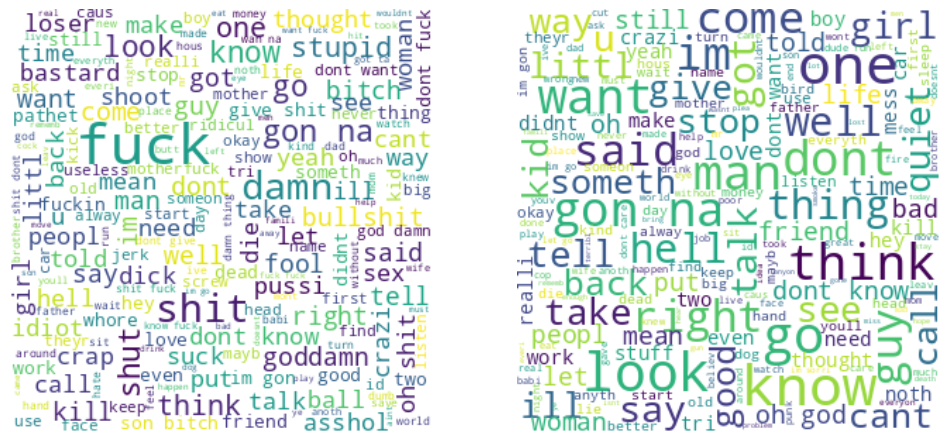

In [14]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(reference_wordcloud, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(translation_wordcloud, interpolation="bilinear")
ax2.axis("off")
plt.show()